# K-Means Clustering with Iris Dataset

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [99]:
iris = pd.read_csv("IRIS.csv")
# multiple ways to get x values for clustering
x = iris.iloc[:, [0, 1, 2, 3]].values
x2=iris[iris.drop("species",axis=1).columns].values

In [100]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [101]:
x2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Explorative Datenanalyse

In [102]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [104]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

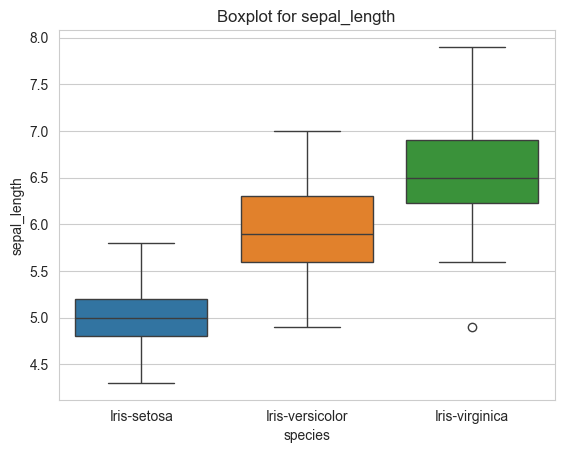

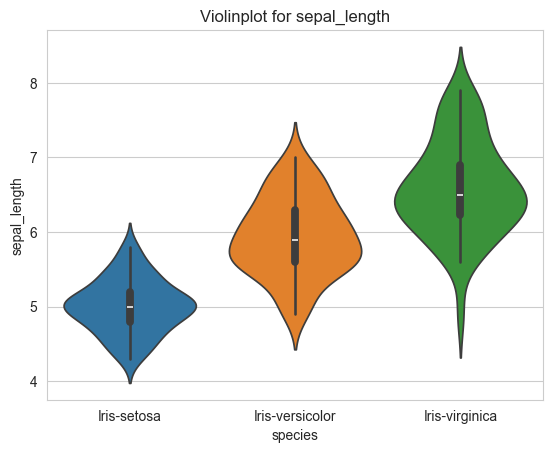

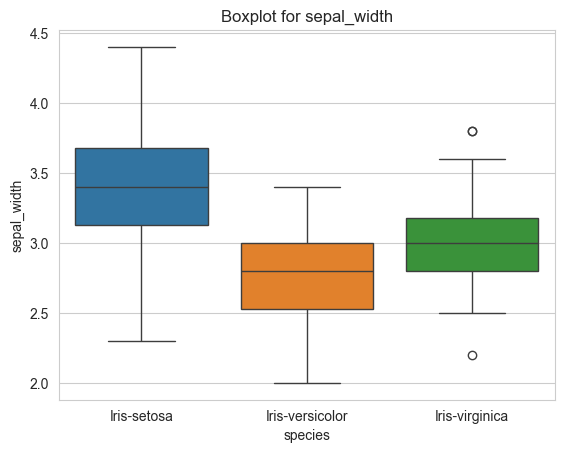

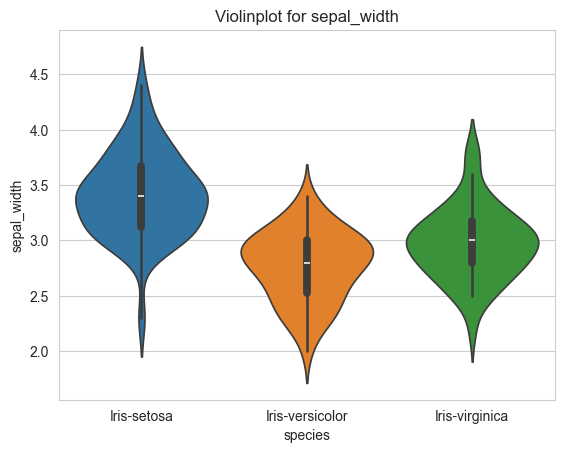

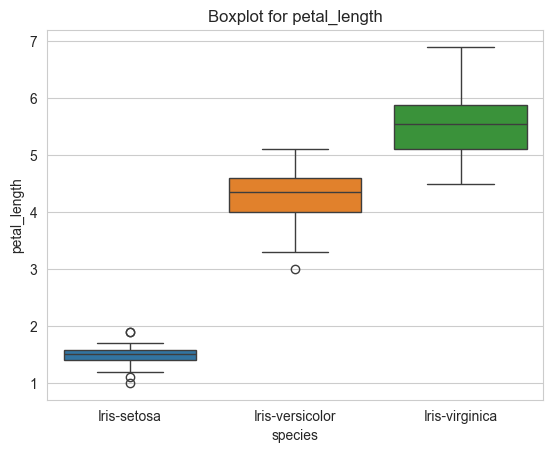

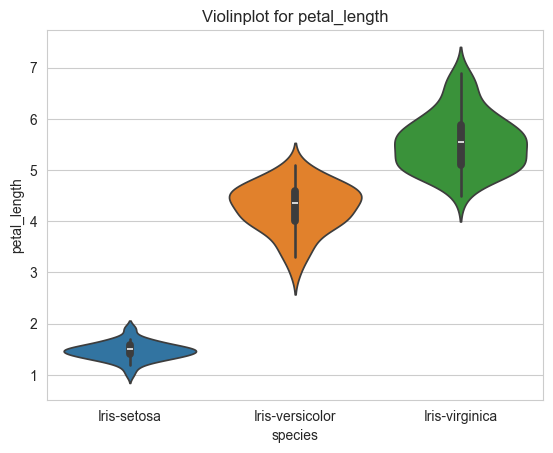

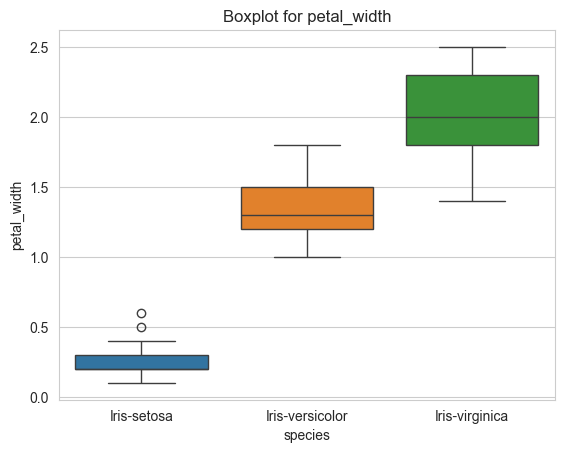

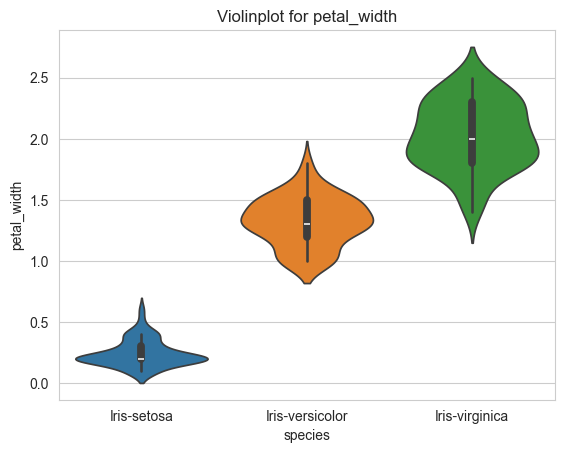

In [105]:
columns_to_plot = list(iris.drop("species",axis=1).columns)


for column in columns_to_plot:
    sns.boxplot(x="species",y=column,data=iris,hue="species").set(title=f"Boxplot for {column}")
    plt.show()
    sns.violinplot(x="species",y=column,data=iris,hue="species").set(title=f"Violinplot for {column}")
    plt.show()

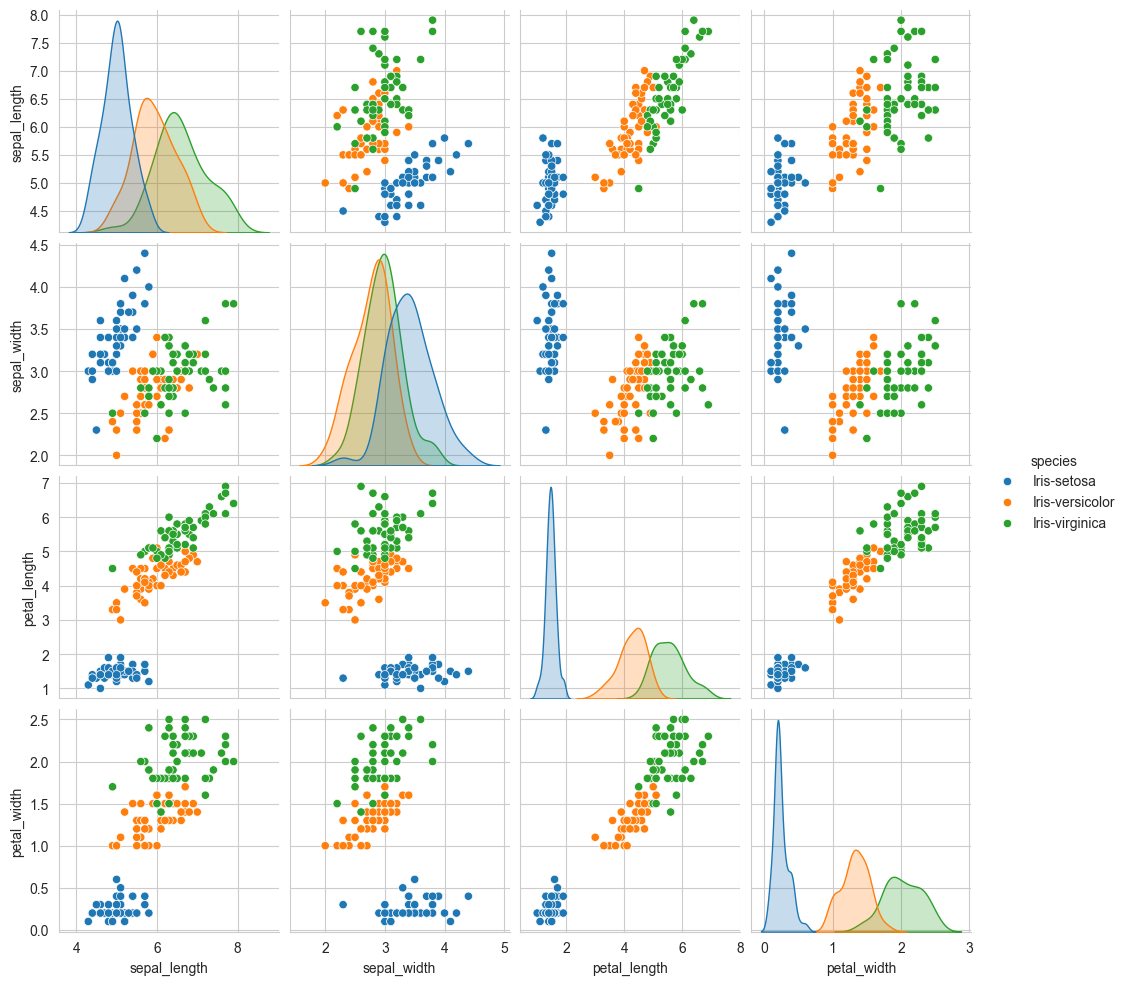

In [106]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species")
plt.show()

## K-Means Clustering

In [107]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


### Elbow-Methode

Elbow Method is a technique that used to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value also called inertia.

`WCSS - Is defined as the sum of square distances between the centroids and
each points.`

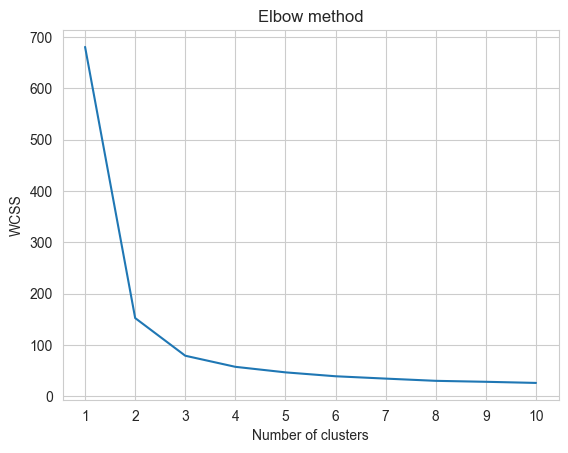

In [108]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.xticks(ticks=range(1,11))
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [109]:
# Do the Clustering with optimal number k of clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [135]:
# Assign an unknown iris to a cluster

y_sample = kmeans.predict(np.array([5.9, 3. , 5.1, 4.8]).reshape(1,-1))
assigned_cluster = y_sample[0]
assigned_cluster

2

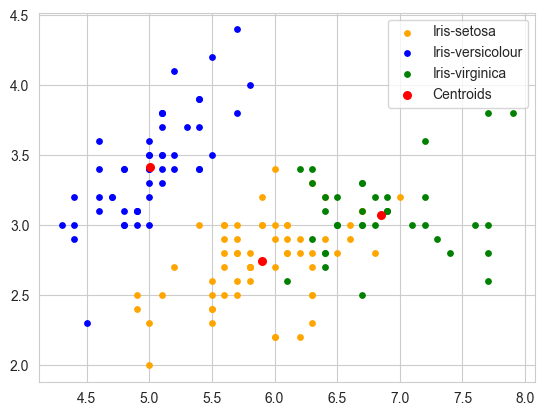

In [139]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 15, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 15, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 15, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'red', label = 'Centroids')

plt.legend()

### Silhouette Score

Die `silhouette_score` Funktion aus der `sklearn.metrics` Bibliothek in Python ist ein Werkzeug zur Messung der Qualität von Clustern, die durch Algorithmen wie k-means erzeugt werden. Sie wird verwendet, um zu beurteilen, wie gut jedes Objekt zu seinem eigenen Cluster (Kohäsion) im Vergleich zu anderen Clustern (Separation) passt. 


1. **Konzept der Silhouette-Analyse**: Die Silhouette-Analyse misst, wie ähnlich ein Objekt zu seinem eigenen Cluster im Vergleich zu anderen Clustern ist. Jedes Objekt erhält einen Silhouette-Wert, der auf der Differenz zwischen der Distanz innerhalb des Clusters und der Distanz zum nächsten Cluster basiert.

2. **Berechnung des Silhouette-Werts**: Für jedes Objekt wird der durchschnittliche Abstand zu den anderen Objekten im selben Cluster (a) und der durchschnittliche Abstand zu den Objekten im nächstgelegenen Cluster, zu dem das Objekt nicht gehört (b), berechnet. Der Silhouette-Wert für jedes Objekt ist dann $$ \frac{(b - a)}{\max(a, b)} $$ Dieser Wert liegt zwischen -1 und 1.
   - Wenn der Wert nahe 1 ist, ist das Objekt gut seinem eigenen Cluster zugeordnet.
   - Wenn der Wert nahe 0 ist, liegt das Objekt nahe an der Grenze zwischen zwei Clustern.
   - Wenn der Wert nahe -1 ist, ist das Objekt wahrscheinlich dem falschen Cluster zugeordnet.\
   </br>

3. **Silhouette-Score in Ihrem Code**: Im Beispiel `silhouette_score(df[sel_columns], kmeans.labels_)` wird der durchschnittliche Silhouette-Wert für alle Objekte im Datensatz berechnet. `df[sel_columns]` repräsentiert die ausgewählten Spalten der Daten, die für das Clustering verwendet werden, und `kmeans.labels_` sind die Cluster-Labels, die von einem k-Means-Algorithmus zugewiesen wurden.

4. **Interpretation des Scores**: 
   - Ein hoher durchschnittlicher Silhouette-Score (nahe 1) deutet darauf hin, dass die Cluster gut definiert und voneinander getrennt sind.
   - Ein niedriger Score (nahe 0 oder negativ) weist darauf hin, dass die Cluster überlappend sind oder die Datenpunkte möglicherweise falsch zugeordnet wurden.

Zusammenfassend hilft der Silhouette-Score dabei, die Qualität der Clusterzuordnung zu beurteilen, indem er bewertet, wie nah sich die Objekte innerhalb eines Clusters im Vergleich zu anderen Clustern befinden.

In [113]:
from sklearn.metrics import silhouette_score

silhouette_score(X=x,labels=kmeans.labels_, metric="euclidean")

0.5525919445499754